Python libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

load/open the files

In [78]:
data1=pd.read_csv('pumas_occupations_num_employees.csv')

#CSV tiene 529202 filas y 6 columnas

data2=pd.read_csv('occupations_avg_wage.csv')

#CSV tiene 617 filas y 3 columnas

In this cell, I analyze some information from the datasets

In [79]:
#Valores unicos de ubicaciones
location=data1['puma_name'].unique()
print(f'The CSV file "data1" contains {len(location)} Locations') #2378


#Valores únicos de ocupaciones
occupation1=data1['occupation_id'].unique()
print(f'The CSV file "data1" contains {len(occupation1)} Occupations') #529

#Comprobar si existe la misma cantidad de ocupaciones que en el otro dataset
occupation2=data2['Detailed Occupation'].unique()
print(f'The CSV file "data2" contains {len(occupation2)} Occupations') #617 


The CSV file "data1" contains 2378 Locations
The CSV file "data1" contains 529 Occupations
The CSV file "data2" contains 617 Occupations


In this cell, I merge both datasets

In [80]:
#Cambio el nombre de todas las columnas para poder trabajar en mismos terminos

#Para el dataset1:
data1.columns=['Location ID','Location','Occupation ID','Occupation','Number of employees','AVG Salary for Each Occupation by Location']
data1.head()
#Para el dataset2:
data2.columns=['Occupation ID','Occupation','AVG National Salary for Each Occupation']
data2.head()

#Uno los dos datasets en un único llamado 'df'
df=pd.merge(data1,data2, on=['Occupation','Occupation ID']) #Los uno en Occupation y Occupation ID, ya que son los valores que tienen en común
#Despliego el valor para visualizarlo
df.head()

,Location ID,Location,Occupation ID,Occupation,Number of employees,AVG Salary for Each Occupation by Location,AVG National Salary for Each Occupation
0,79500US1205701,"Tampa City (Central) PUMA, FL",111021,General & operations managers,303,216321.300330,78932.012723
1,79500US1205704,"Hillsborough County (North Central) PUMA, FL",111021,General & operations managers,523,76270.904398,78932.012723
2,79500US1210101,"Pasco County (East Central) PUMA, FL",111021,General & operations managers,602,52711.337209,78932.012723
3,79500US1206903,"Lake (South) & Sumter (South) Counties PUMA, FL",111021,General & operations managers,472,48562.330508,78932.012723
4,79500US1206901,"Lake County (North) PUMA, FL",111021,General & operations managers,1005,83048.953234,78932.012723


Average Salaries by Location

In [81]:
#Agrupo por cada localización, y calculo el promedio del promedio de cada ocupación, luego cambio el nombre de la columna por 'Average salary by location' y finalmente reseteo los index
AVG_BY_LOCATION=df.groupby('Location').agg({'AVG Salary for Each Occupation by Location':'mean'}).rename(columns={'AVG Salary for Each Occupation by Location':'AVG Salary by Location'}).reset_index()
AVG_BY_LOCATION.head() #Despliego para visualziar y verificar datos

,Location,AVG Salary by Location
0,"Aberdeen & Havre de Grace Cities PUMA, MD",47793.452602
1,"Acadia & Vermilion Parishes PUMA, LA",36217.519325
2,"Ada City PUMA, OK",30440.054794
3,"Adams & Franklin (Southeast) Counties PUMA, PA",40010.469563
4,"Adams, Pike, Brown, Schuyler & Mason Counties ...",38624.739842


Average Salaries for Each Occupation by Location

In [82]:
#Agrupo por localización los valores de df y luego me encargo de encontrar los id de los salarios máximos de cada ocupación, y los almaceno en 'H_S'
H_S=df.groupby('Location')['AVG Salary for Each Occupation by Location'].idxmax() 

#Teniendo los id's de las ocupaciones con el salario más alto, ocupo los mismos id's para identificar a que ocupación está asignado
HIGHEST_PAID_OCCUPATION=df[['Location','Occupation','AVG Salary for Each Occupation by Location','AVG National Salary for Each Occupation']].iloc[H_S]
HIGHEST_PAID_OCCUPATION.head() #Despliego para visualizar y verificar los datos

,Location,Occupation,AVG Salary for Each Occupation by Location,AVG National Salary for Each Occupation
438944,"Aberdeen & Havre de Grace Cities PUMA, MD",Aerospace engineers,162095.513158,93327.564278
286563,"Acadia & Vermilion Parishes PUMA, LA",Data entry keyers,180331.267606,23049.434304
4467,"Ada City PUMA, OK",Chief executives & legislators,323841.389381,141283.836459
408564,"Adams & Franklin (Southeast) Counties PUMA, PA",Surgeons,492365.162791,282720.324022
137038,"Adams, Pike, Brown, Schuyler & Mason Counties ...",Physicians,389976.986175,206831.792909


Here is the final DataFrame

In [83]:
new_file=pd.merge(HIGHEST_PAID_OCCUPATION,AVG_BY_LOCATION) #Unimos ambos 
new_file=new_file[['Location','AVG Salary by Location','Occupation','AVG Salary for Each Occupation by Location','AVG National Salary for Each Occupation']].sort_values('AVG Salary by Location',ascending=False).reset_index(drop=True)
#Seleecionamos las columnas que nos sirven y las ponemos en el orden deseado. Ademas, los ordenamos por el promedio 'AVG Salary by Location'.

#Cambio el nombre de las columnas pora mayor entendimiento
new_file=new_file.rename(columns={'AVG Salary by Location': 'Average Salary by Location','AVG Salary for Each Occupation by Location':'Average Salary for Each Occupation by Location','AVG National Salary for Each Occupation':'Average National Salary for Each Occupation'})
new_file.to_csv('Challenge.csv') #Guardo el df final en un archivo csv
new_file.head()

,Location,Average Salary by Location,Occupation,Average Salary for Each Occupation by Location,Average National Salary for Each Occupation
0,"Inner Mission & Castro PUMA, CA",96420.973134,Surgeons,572399.815668,282720.324022
1,"Battery Park City, Greenwich Village & Soho PU...",94839.246750,Dentists,668644.000000,127707.800538
2,"Chelsea, Clinton & Midtown Business District P...",91590.648998,Other financial specialists,668644.026490,98080.728621
3,"Cupertino, Saratoga Cities & Los Gatos Town PU...",85380.084584,Industrial production managers,572399.803279,77305.982431
4,"Essex County (Northwest) PUMA, NJ",84129.644104,Insurance sales agents,645342.838710,53854.686494


Data Visualization

In the first graph, what I aim to show is which jobs are the most common highest-paying ones and make a comparison with their color coding to see if being the most common necessarily makes them the highest paid.

In [84]:
#Codigo para contar la cantidad de veces que se repiten las occupaciones y tambien tener su sueldo promedio a nivel pais
v1=new_file.groupby('Occupation').agg({'Occupation':'count'}).rename(columns={'Occupation':'Total'}).sort_values(by='Total',ascending=False).reset_index()
aux=new_file[['Occupation','Average National Salary for Each Occupation']]
v1=pd.merge(v1,aux)
#Elimino valores que se duplcian al realizar el merge
v1=v1.drop_duplicates()


#Para la visualización elegi un treemap para destacar con el tamaño cuales son los trabajos que se suelen ser los mejroes pagados por locacización
#Ademas decidi agregar escala de color secuencial que represente el sueldo promedio que reciben para poder analizar si las mejor paagdas mas comunes necesarimante son las de mayor sueldo promedio
g1=px.treemap(v1,path=['Occupation'],values='Total',color='Average National Salary for Each Occupation',color_continuous_scale='Viridis_r')


#Tamaño Grafico
g1.update_layout(     
    width=1500,  # Ancho del gráfico en píxeles
    height=800,  # Alto del gráfico en píxeles
    title='The Highest-paying and Most Common Occupations in The Country',
    title_y=0.965,
    title_x=0.055, 
    title_font_color='black',
    title_font_size=25,
    coloraxis_colorbar=dict(
        x=1.0,
        title="Average National Salary in Dollars",
        title_font=dict(size=20),
    )
)

g1.update_traces(textfont=dict(size=22))
g1.show()

#De la visualización se puede apreciar como hay ciertas ocupaciones que se repite nde manera muy frecuente y al mismo tiempo se aprecia como la ocupación mejor pagada más común no es la mejor pada, siendo en realidad Surgeons.

In this graph, I aim to show with boxplots the 20 occupations with the highest salaries and demonstrate how only a few of them are the most common. This means that it shows that the highest-paying jobs are not necessarily the most common. By using colors, I highlight which ones are the most common within the top 10

In [85]:
v2=new_file.groupby('Occupation').agg({'Occupation':'count'}).rename(columns={'Occupation':'Total'}).sort_values(by='Total',ascending=False).reset_index()
aux=new_file[['Occupation','Average Salary for Each Occupation by Location']]
v2=pd.merge(v2,aux)

v2=v2.sort_values(by='Average Salary for Each Occupation by Location',ascending=False).reset_index(drop=True)

hp=[] #Lista que almacenara las ocupaciones mejor pagadas una única vez 

#Realizo ciclo para encontrar las ocupaciones mejor pagadas y seleccionar las 20 con mayor sueldo promedio
for i in range(len(v2)):
    temp=v2.iloc[i,0] #Variable temporal que almacena una ocupacion, y las recorre en el orden de la mejor pagada a la peor
    #Si es que no esta en la lista de la mejor pagada se agrega
    if temp not in hp:
        hp.append(temp)
    if len(hp)==20: #Se detiene cuando tengo 20 elementos en la lista
        break
#Mas repetidos
mr=[] #Lista que almacenara las ocupaciones mas comunes con sueldo mas altos

#Realizo ciclo para encontrar las ocupaciones mejor pagadas y seleccionar las 10 con mayor sueldo promedio
v2=v2.sort_values(by='Total',ascending=False)
for i in range(len(v2)):
    temp=v2.iloc[i,0] #Variable temporal que almacena una ocupacion, y las recorre en el orden de la más frecuente con sueldo más alto
    #Si es que no esta en la lista de la mejor pagada se agrega
    if temp not in mr:
        mr.append(temp)
    if len(mr)==10: #Se detiene cuando tengo 10 elementos en la lista
        break
v2['Most paid']=v2['Occupation'].isin(mr)


c:\Users\GAMER 101\anaconda3\Lib\site-packages\matplotlib\cbook.py:1261: RuntimeWarning:

invalid value encountered in scalar multiply

c:\Users\GAMER 101\anaconda3\Lib\site-packages\matplotlib\cbook.py:1262: RuntimeWarning:

invalid value encountered in scalar multiply

c:\Users\GAMER 101\anaconda3\Lib\site-packages\matplotlib\cbook.py:1261: RuntimeWarning:

invalid value encountered in scalar multiply

c:\Users\GAMER 101\anaconda3\Lib\site-packages\matplotlib\cbook.py:1262: RuntimeWarning:

invalid value encountered in scalar multiply



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Surgeons'),
  Text(1, 0, 'Music directors and composers'),
  Text(2, 0, 'Magnetic resonance imaging technologists'),
  Text(3, 0, 'Other financial specialists'),
  Text(4, 0, 'Actuaries'),
  Text(5, 0, 'Producers & directors'),
  Text(6, 0, 'Athletes and sports competitors'),
  Text(7, 0, 'Dentists'),
  Text(8, 0, 'Entertainers & performers, sports & related workers, all other'),
  Text(9, 0, 'Chiropractors'),
  Text(10, 0, 'Personal financial advisors'),
  Text(11, 0, 'Judicial law clerks'),
  Text(12, 0, 'Insurance underwriters'),
  Text(13, 0, 'Computer network architects'),
  Text(14, 0, 'Nuclear medicine technologists and medical dosimetrists'),
  Text(15, 0, 'Biological scientists'),
  Text(16, 0, 'Physicians'),
  Text(17, 0, 'Optometrists'),
  Text(18, 0, 'Sales engineers'),
  Text(19, 0, 'Broadcast announcers and radio disc jockeys')])

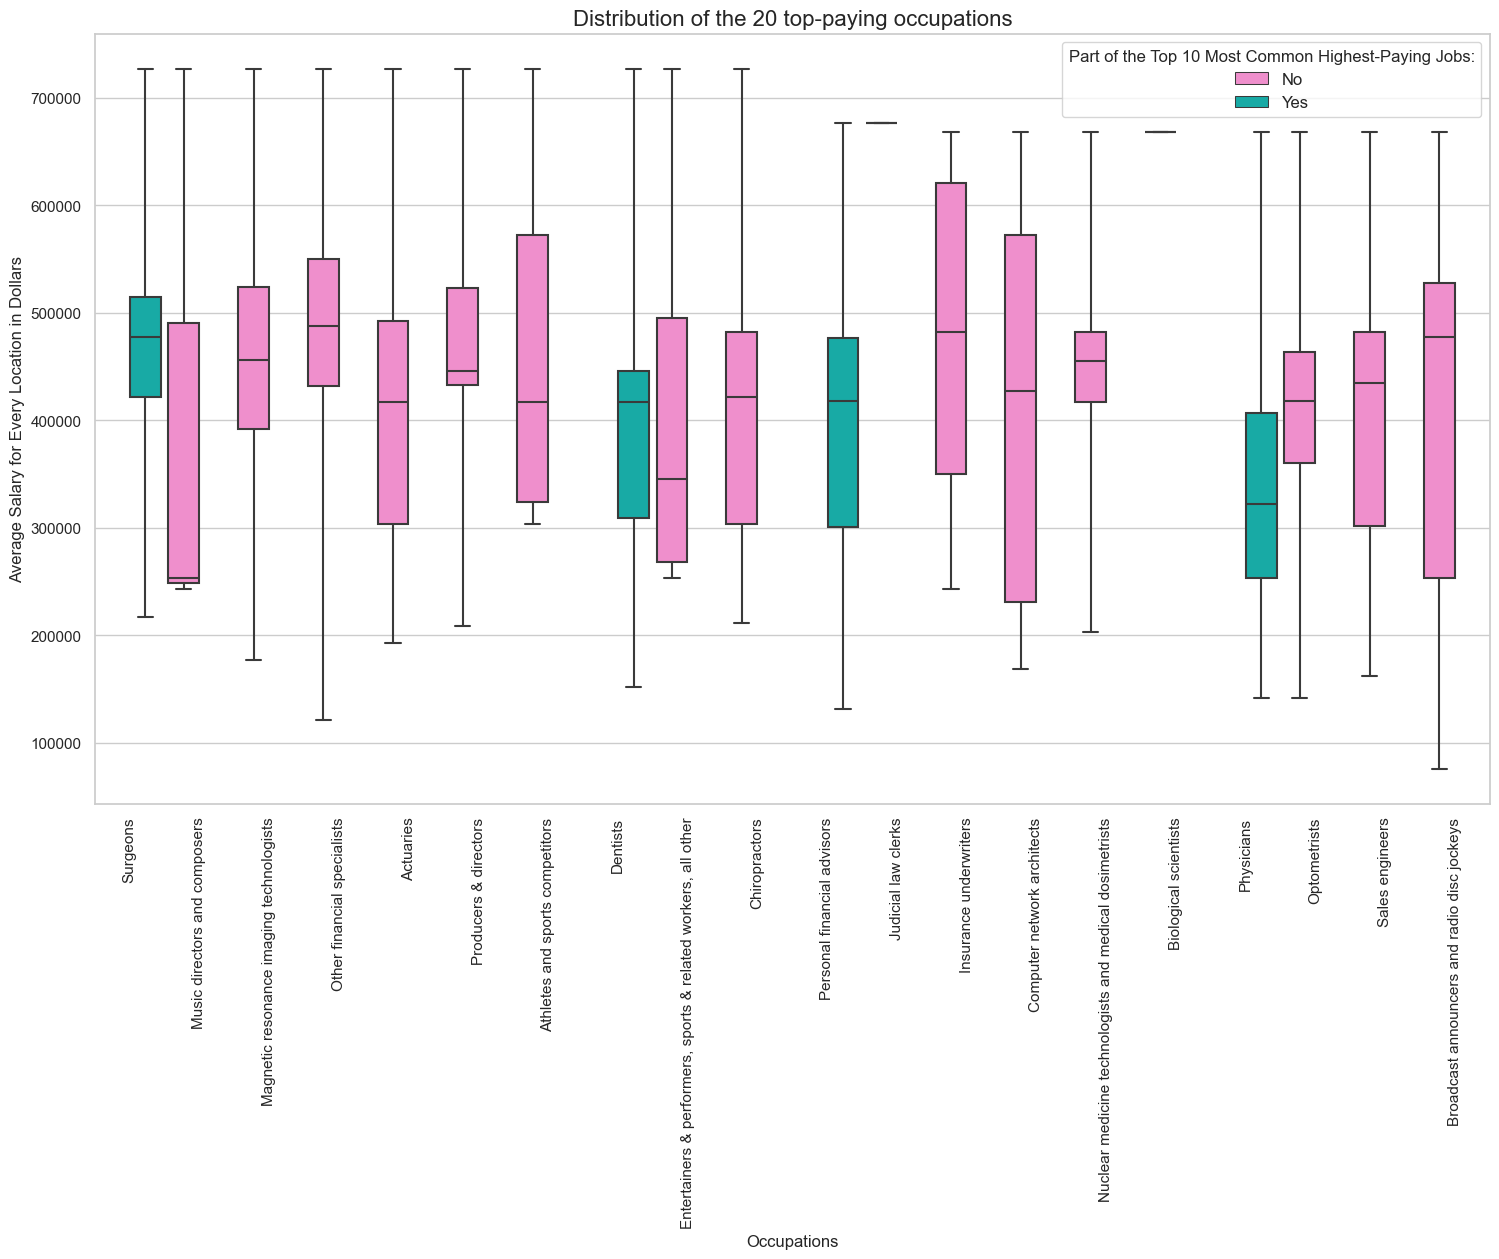

In [86]:

sns.set_theme(style='whitegrid')

plt.figure(figsize=(18, 10))

g2=sns.boxplot(x='Occupation',y='Average Salary for Each Occupation by Location',hue='Most paid',order=hp,showfliers=False,data=v2,palette=['#ff7fd0','#00c2bb'],width=0.9,whis=np.inf)

g2.set_xlabel('Occupations',fontsize=12)
g2.set_ylabel('Average Salary for Every Location in Dollars',fontsize=12)
g2.legend(title='Part of the Top 10 Most Common Highest-Paying Jobs:', labels=['No','Yes'],fontsize=12, title_fontsize=12)

plt.title('Distribution of the 20 top-paying occupations', fontsize=16)

plt.xticks(rotation=90)

BONUS

DOLLAR A PESOS CHILENOS

In [87]:
import glob
dolar_price=pd.DataFrame()
dolar = glob.glob('Dollar_files/Dolar 20*.csv') #Leo la ruta de los archivos csv del 2016 al 2022

for i in dolar:
    df_aux=pd.read_csv(i,encoding='latin1',sep=';') #Me enargo de abriar cada dataset en al ruta establecida
    dolar_price=pd.concat([dolar_price,df_aux])



#Solo usare el valor promedio y el de diciembre
dolar_price=dolar_price[['ï»¿DÃ­a','Dic']]
dolar_price.rename(columns={'ï»¿DÃ­a':'Days','Dic':'Dollar Price'},inplace=True)
dolar_price=dolar_price.query('Days =="Promedio"').reset_index(drop=True)

year_base=2016
#Creamos la columna de los años
dolar_price['Year'] = range(year_base, year_base + len(dolar_price))
dolar_price=dolar_price[['Year','Dollar Price']]

dolar_price.head(10)

#aqui tengo los precios en dolares proemdi ode diciembre desde el 2016 al 2024


,Year,Dollar Price
0,2016,"667,17"
1,2017,"638,13"
2,2018,"681,99"
3,2019,"770,39"
4,2020,"734,73"
5,2021,"849,12"
6,2022,"875,66"


Salaries in USD correspond to CLP

In [88]:
selected=2022  #AQUI YO PONGO EL AÑO DEL QUE QUIERO REALIZARLO
indice=dolar_price[dolar_price['Year']==selected].index[0]
BASE=dolar_price.iloc[indice,0] 

df_bonus1=pd.read_csv('Challenge.csv') #Leo el archivo que cree como challenge en la parte obligatoria

df_bonus1[['Average Salary by Location','Average Salary for Each Occupation by Location','Average National Salary for Each Occupation']]=df_bonus1[['Average Salary by Location','Average Salary for Each Occupation by Location','Average National Salary for Each Occupation']]*BASE

df_bonus1=df_bonus1.rename(columns={'Average Salary by Location':'Average Salary by Location ($CLP)','Average Salary for Each Occupation by Location':'Average Salary for Each Occupation by Location($CLP)','Average National Salary for Each Occupation':'Average National Salary for Each Occupation ($CLP)'})
df_bonus1 = df_bonus1.drop('Unnamed: 0', axis=1)
df_bonus1.to_csv('bonus_clp.csv')
df_bonus1.head()

,Location,Average Salary by Location ($CLP),Occupation,Average Salary for Each Occupation by Location($CLP),Average National Salary for Each Occupation ($CLP)
0,"Inner Mission & Castro PUMA, CA",1.949632e+08,Surgeons,1.157392e+09,5.716605e+08
1,"Battery Park City, Greenwich Village & Soho PU...",1.917650e+08,Dentists,1.351998e+09,2.582252e+08
2,"Chelsea, Clinton & Midtown Business District P...",1.851963e+08,Other financial specialists,1.351998e+09,1.983192e+08
3,"Cupertino, Saratoga Cities & Los Gatos Town PU...",1.726385e+08,Industrial production managers,1.157392e+09,1.563127e+08
4,"Essex County (Northwest) PUMA, NJ",1.701101e+08,Insurance sales agents,1.304883e+09,1.088942e+08


Entropy of labor by location

In [107]:
#Calculamos la suma del promedio de todos los salarios por localización
df_bonus2=df.copy()
df_bonus2=df_bonus2.groupby('Location').agg({'AVG Salary for Each Occupation by Location':'sum'}).rename(columns={'AVG Salary for Each Occupation by Location':'Total Salaries by Location'}).reset_index()
#Calculamos el total de salarios por localización
df_bonus2=pd.merge(df_bonus2,df)
df_bonus2=df_bonus2[['Location','Occupation','AVG Salary for Each Occupation by Location','Total Salaries by Location']]
df_bonus2 = df_bonus2[df_bonus2['AVG Salary for Each Occupation by Location'] != 0] #Elimnamos los valores 0 para eviatr problemas con logaritmo
df_bonus2['Salary Proportion by Occupation']=df_bonus2['AVG Salary for Each Occupation by Location']/df_bonus2['Total Salaries by Location']
df_bonus2['Entropy term']=-df_bonus2['Salary Proportion by Occupation']*np.log(df_bonus2['Salary Proportion by Occupation'])
df_bonus2=df_bonus2.groupby('Location').agg({'Entropy term':'sum'}).rename(columns={'Entropy term':'Entropy of labor of Each Occupation by location'}).reset_index()

df_bonus2=pd.merge(df_bonus2,new_file,on='Location')
df_bonus2=df_bonus2[['Location','Average Salary by Location','Occupation','Average Salary for Each Occupation by Location','Average National Salary for Each Occupation','Entropy of labor of Each Occupation by location']].sort_values(by='Average Salary by Location',ascending=False)

df_bonus2.to_csv('bonus_entropy.csv')
df_bonus2.head()

,Location,Average Salary by Location,Occupation,Average Salary for Each Occupation by Location,Average National Salary for Each Occupation,Entropy of labor of Each Occupation by location
1014,"Inner Mission & Castro PUMA, CA",96420.973134,Surgeons,572399.815668,282720.324022,4.923224
120,"Battery Park City, Greenwich Village & Soho PU...",94839.246750,Dentists,668644.000000,127707.800538,4.667196
375,"Chelsea, Clinton & Midtown Business District P...",91590.648998,Other financial specialists,668644.026490,98080.728621,4.687487
512,"Cupertino, Saratoga Cities & Los Gatos Town PU...",85380.084584,Industrial production managers,572399.803279,77305.982431,4.642591
683,"Essex County (Northwest) PUMA, NJ",84129.644104,Insurance sales agents,645342.838710,53854.686494,4.743560
